# Imagen

Una imagen es una función bidimensional `f(x,y)` donde `x` e `y` representan las coordenadas espaciales y el valor de `f`, la intensidad de la imagen en dicho punto.

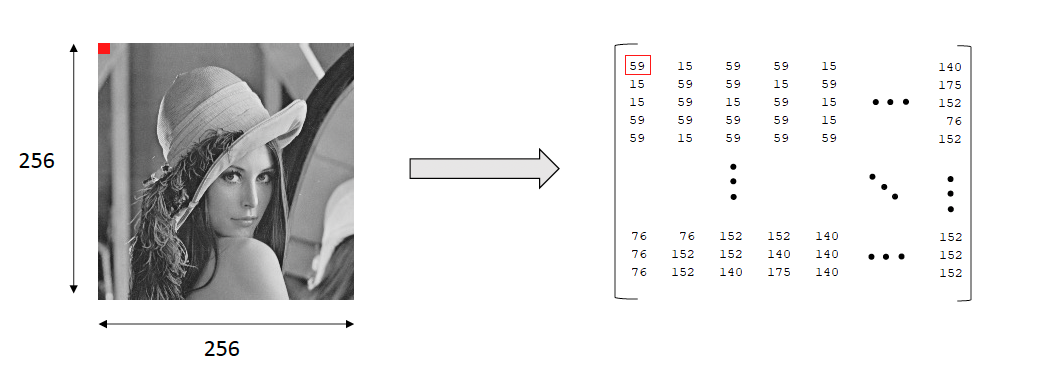

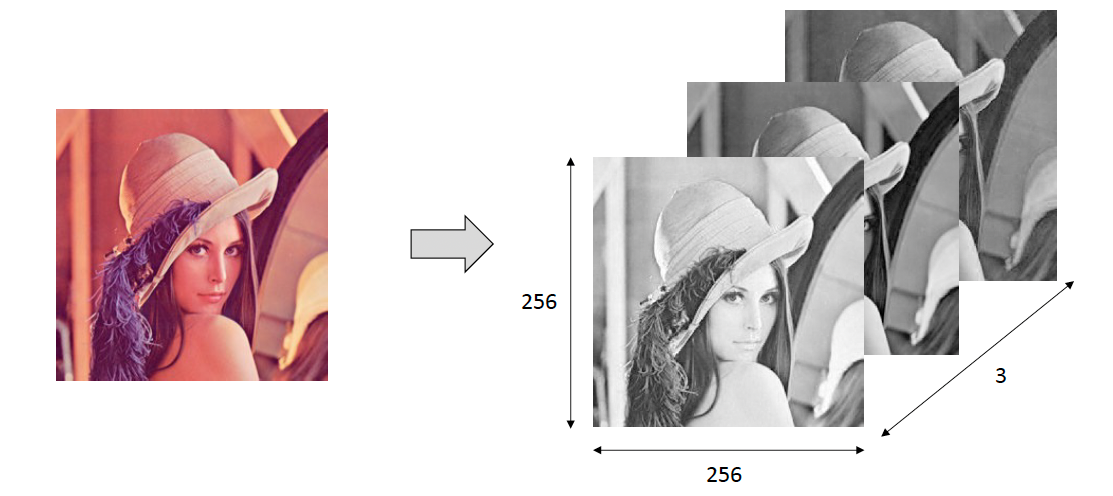

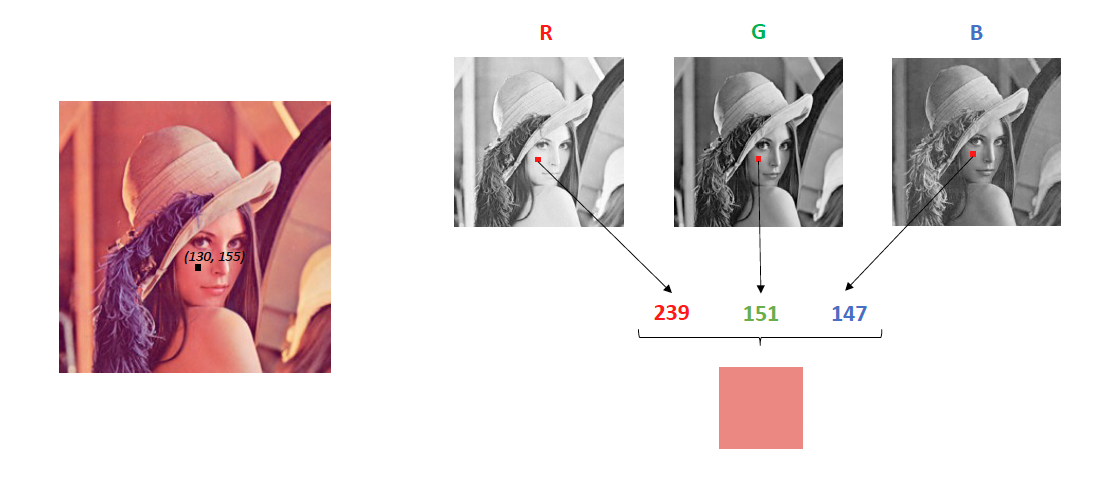

## OpenCV

OpenCV (Biblioteca de visión por computadora de código abierto: http://opencv.org) es una biblioteca de código abierto que incluye varios cientos de algoritmos de visión por computadora. El documento describe la llamada API OpenCV 2.x, que es esencialmente una API C++, a diferencia de la API OpenCV 1.x basada en C (la API C está en desuso y no se ha probado con el compilador "C" desde el lanzamiento de OpenCV 2.4).

OpenCV tiene una estructura modular, lo que significa que el paquete incluye varias bibliotecas compartidas o estáticas. Están disponibles los siguientes módulos:

- Funcionalidad principal (núcleo): un módulo compacto que define estructuras de datos básicas, incluida la densa matriz multidimensional Mat y las funciones básicas utilizadas por todos los demás módulos.

- Procesamiento de imágenes (imgproc): un módulo de procesamiento de imágenes que incluye filtrado de imágenes lineales y no lineales, transformaciones geométricas de imágenes (cambio de tamaño, deformación afín y de perspectiva, reasignación genérica basada en tablas), conversión de espacio de color, histogramas, etc.

- Análisis de video (video): un módulo de análisis de video que incluye estimación de movimiento, resta de fondo y algoritmos de seguimiento de objetos.

- Calibración de cámara y reconstrucción 3D (calib3d): algoritmos básicos de geometría de vistas múltiples, calibración de cámara única y estéreo, estimación de la pose de objetos, algoritmos de correspondencia estéreo y elementos de reconstrucción 3D.
          
- Marco de características 2D (features2d): detectores de características destacadas, descriptores y comparadores de descriptores.

- Detección de objetos (objdetect): detección de objetos y instancias de clases predefinidas (por ejemplo, caras, ojos, tazas, personas, automóviles, etc.).

- GUI de alto nivel (highgui): una interfaz fácil de usar para capacidades de interfaz de usuario simples.

- Video I/O (videoio): una interfaz fácil de usar para captura de video y códecs de video.

Image dimensions:  (256, 256, 3)


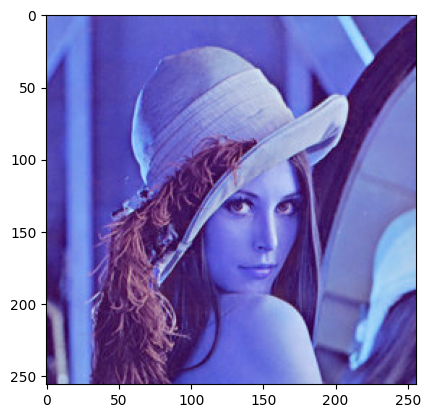

In [8]:
# READ AN IMAGE
# pip install opencv-python
import matplotlib.pyplot as plt
import cv2
import numpy as np
import warnings
warnings.filterwarnings("ignore")

img = cv2.imread('images/Lena_RGB.png')
print('Image dimensions: ', np.shape(img))

plt.imshow(img, cmap='gray')
plt.show()

In [4]:
# Extraer por separado la imagen de grises de cada canal (B G R)
R = img[:,:,2] #Tercer Canal R
G = img[:,:,1] #Segundo Canal G
B = img[:,:,0] #Primer Canal B

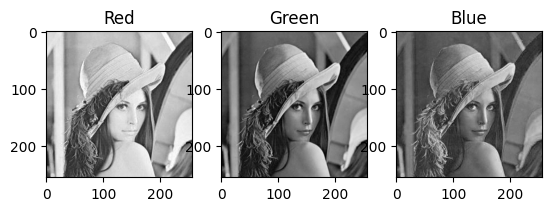

In [5]:
# Visualizar los canales en un subplot
fig, ax = plt.subplots(1,3)
ax[0].imshow(R, cmap='gray'), ax[0].set_title('Red')
ax[1].imshow(G, cmap='gray'), ax[1].set_title('Green')
ax[2].imshow(B, cmap='gray'), ax[2].set_title('Blue')
plt.show()

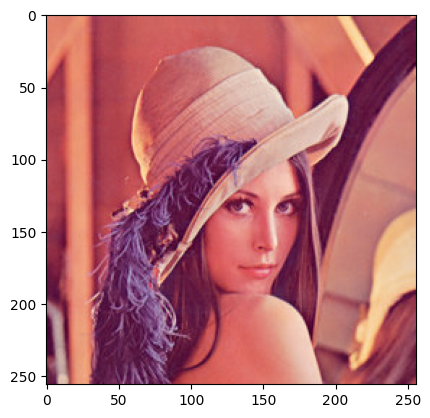

In [6]:
# Convertir BGR en RGB
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(RGB_img, cmap='gray')
plt.show()

### TRANSFORMACIONES DE INTENSIDAD

## Cambio de brillo

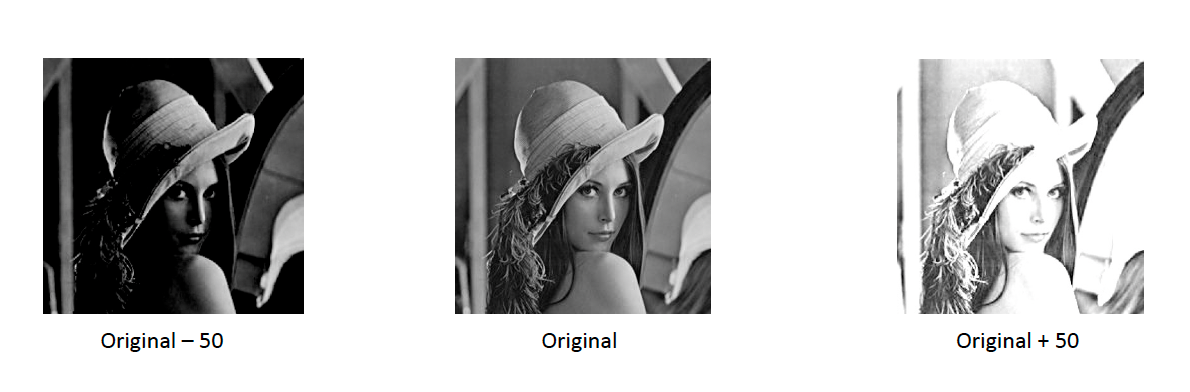

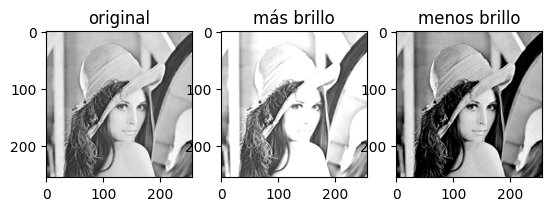

In [7]:
# CAMBIO DE BRILLO
img = cv2.imread('images/Lena_RGB.png')
img = img[:,:,2] # red color

mas_brillo = 50
menos_brillo = -100
mas_brillo_img = cv2.add(img, mas_brillo) # Importante el "cv2.add" en vez de "+"
menos_brillo_img = cv2.add(img, menos_brillo)

fig, ax = plt.subplots(1,3)
ax[0].imshow(img, cmap='gray'), ax[0].set_title('original')
ax[1].imshow(mas_brillo_img, cmap='gray'), ax[1].set_title('más brillo')
ax[2].imshow(menos_brillo_img, cmap='gray'), ax[2].set_title('menos brillo')
plt.show()

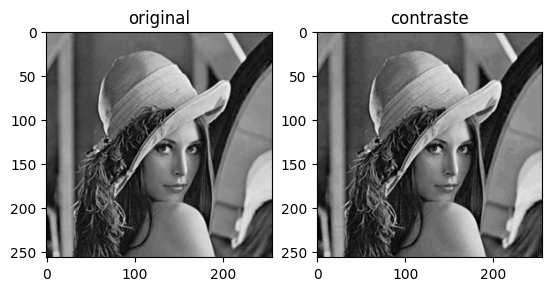

True

In [8]:
# CAMBIO DE CONTRASTE de acuerdo con el programa GIMP
img = cv2.imread('images/Lena_RGB.png')
img = img[:,:,1] # canal verde

contraste = -100

f = 131*(contraste + 127)/(127*(131-contraste)) # Ecuación establecida para cambiar constrante basada en GIMP
alpha_c = f
gamma_c = 127*(1-f)

contrast_img = cv2.addWeighted(img, alpha_c, img, 0, gamma_c)

fig, ax = plt.subplots(1,2)
ax[0].imshow(img, cmap='gray'), ax[0].set_title('original')
ax[1].imshow(contrast_img, cmap='gray'), ax[1].set_title('contraste')
plt.show()

# Para ver la imagen cuando se disminuye el contraste... 
cv2.imwrite('contrast.png', contrast_img)

### CONVERSIONES DEL ESPACIO DE COLOR

## Conversiones del espacio de color RGB a CMYK

Tanto RGB como CMYK son modos para mezclar colores en diseño gráfico. Como referencia rápida, el modo de color RGB es mejor para trabajos digitales, mientras que CMYK se utiliza para productos impresos.



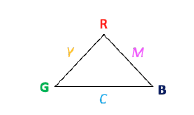

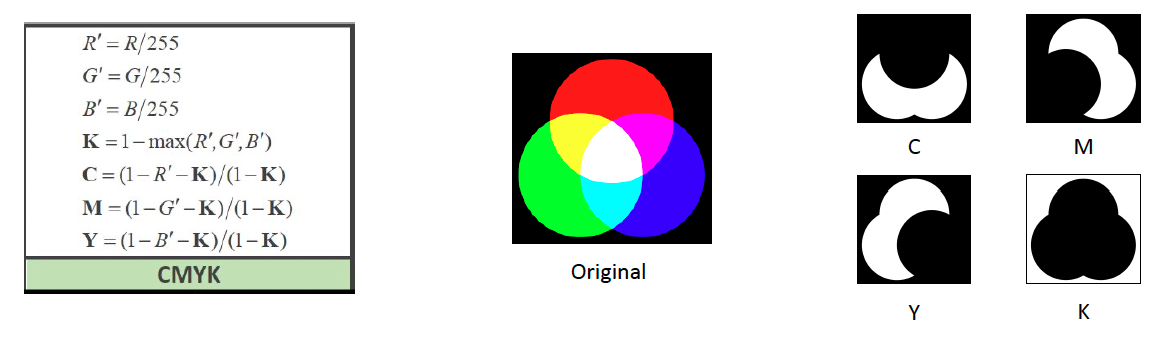

In [ ]:
#!pip install scikit-image

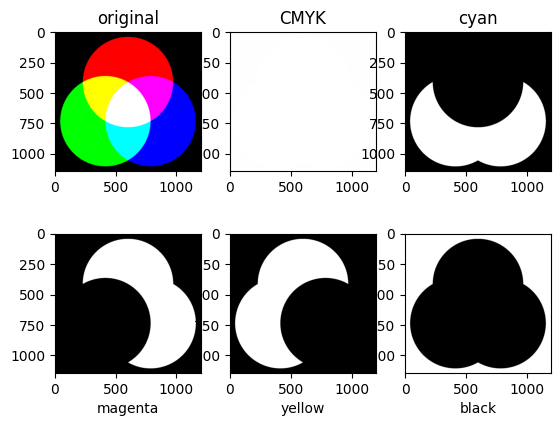

In [9]:
# RGB to CMYK
import numpy as np
#from skimage import io
from skimage import io

img = io.imread('images/colores.png')
rgb = img.copy()
rgb_p = rgb.astype('uint8')/255

with np.errstate(invalid='ignore', divide='ignore'):
    K = 1 - np.max(rgb_p, axis=2)
    # Extrae los canales de acuerdo con la ecuación del power point (RGB)
    
    C = (1 - (img[:,:,0]/255) - K)/(1-K)   # C = (1 - R' - K) / (1-K) - Donde R' = img[:,:,0]/255
    M = (1 - (img[:,:,1]/255) - K)/(1-K)   # M = (1 - G' - K) / (1-K) - Donde G' = img[:,:,1]/255
    Y = (1 - (img[:,:,2]/255) - K)/(1-K)   # Y = (1 - B' - K) / (1-K) - Donde B' = img[:,:,2]/255

CMYK = (np.dstack((C,M,Y,K)))
C,M,Y,K = cv2.split(CMYK)

fig, ax = plt.subplots(2,3)
ax[0,0].imshow(img, cmap='gray'), ax[0,0].set_title('original')
ax[0,1].imshow(CMYK.astype('uint8'), cmap='gray'), ax[0,1].set_title('CMYK')
ax[0,2].imshow(C.astype('uint8'), cmap='gray'), ax[0,2].set_title('cyan')
ax[1,0].imshow(M.astype('uint8'), cmap='gray'), ax[1,0].set_xlabel('magenta')
ax[1,1].imshow(Y.astype('uint8'), cmap='gray'), ax[1,1].set_xlabel('yellow')
ax[1,2].imshow(K.astype('uint8'), cmap='gray'), ax[1,2].set_xlabel('black')
plt.show()

In [10]:
# Otras conversiones

img = cv2.imread('images/Lena_RGB.png')

gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # gray-scale

HSV = cv2.cvtColor(img, cv2.COLOR_BGR2HSV) # (H)ue, (S)aturation and (V)alue

Lab = cv2.cvtColor(img, cv2.COLOR_BGR2Lab) # (L)uminosidad, a-b colores complementarios

YCrCb = cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb) # Y-Luma, Cr-Cb crominancia rojo y azul


### TRANSFORMACIONES GEOMÉTRICAS

## Translación

Una traslación es el desplazamiento de la posición de un objeto. Si se conoce la
magnitud del desplazamiento (𝑡x, 𝑡y) en las direcciones `x` e `y`, respectivamente, se
puede escribir la matriz de transformación `M`como:

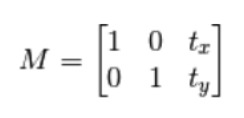

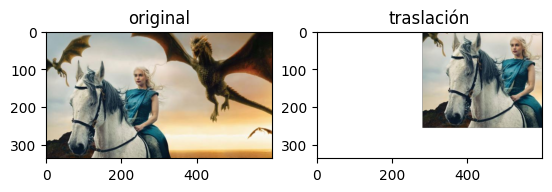

In [11]:
# TRASLACIÓN
img = io.imread('images/GOT.png')
rows, cols, ch = img.shape
 
M = np.float32([[1,0,280],[0,1,-80]]) # Defino la matriz de transformación
new_img = cv2.warpAffine(img,M,(cols,rows)) # Aplico la transformación

figs, ax = plt.subplots(1,2)
ax[0].imshow(img, cmap='gray'), ax[0].set_title('original')
ax[1].imshow(new_img, cmap='gray'), ax[1].set_title('traslación')
plt.show()

## Cropping

El cropping consiste en la selección y extracción de una determinada zona de la imagen que consideraremos como región de interés (ROI, del inglés – region of interest) para centrar los algoritmos únicamente en esa parte específica. Esto es muy interesante cuando queremos extraer características únicamente de una región concreta y el resto de la imagen puede no nos interesa o introduce ruido.

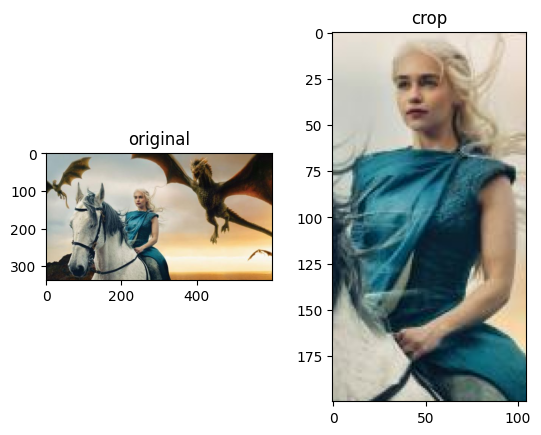

In [12]:
# CROPPING
img = io.imread('images/GOT.png')

new_img = img[90:290, 200:305]

figs, ax = plt.subplots(1,2)
ax[0].imshow(img, cmap='gray'), ax[0].set_title('original')
ax[1].imshow(new_img, cmap='gray'), ax[1].set_title('crop')
plt.show()

## Rotación
La rotación de una imagen consiste en aplicar un determinado ángulo 𝜃 a una
matriz de rotación M.

OpenCV permite además personalizar más la rotación multiplicando por un factor
de escala y modificando el centro de rotación.

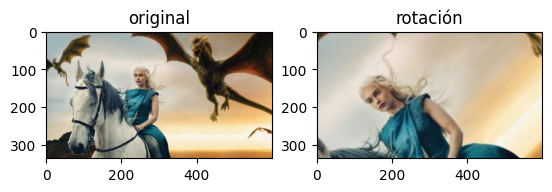

In [13]:
# ROTACIÓN
img = io.imread('images/GOT.png')
rows, cols, ch = img.shape

M = cv2.getRotationMatrix2D((cols/2,rows/2),angle=45,scale=2) # Defino la matriz de transformación
new_img = cv2.warpAffine(img,M,(cols,rows)) # Aplico la transformación

figs, ax = plt.subplots(1,2)
ax[0].imshow(img, cmap='gray'), ax[0].set_title('original')
ax[1].imshow(new_img, cmap='gray'), ax[1].set_title('rotación')
plt.show()

## Perspectiva

La transformación de perspectiva consiste en la rotación de la superficie de proyección (superficie de perspectiva) en un cierto ángulo alrededor 𝜃. La idea de la transformación de perspectiva es: dada una imagen en el plano 2D, colocarla en una posición cualquiera del espacio 3D y después proyectarla sobre el plano de imagen Z=1.

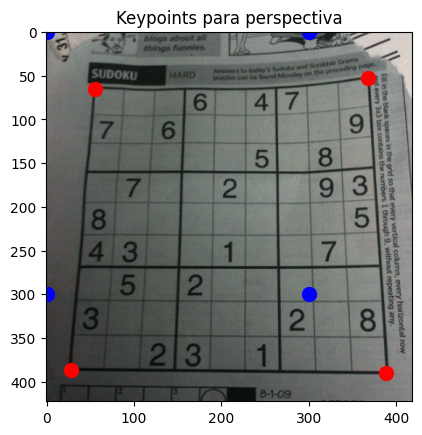

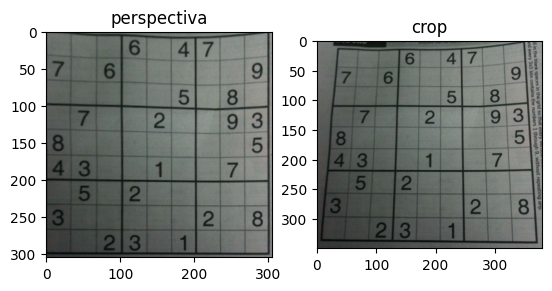

In [14]:
# PERSPECTIVA
img = cv2.imread('images/sudoku.png')
rows, cols, ch = img.shape
 
pts1 = np.float32([[56,65],[368,52],[28,387],[389,390]]) #Puntos de interes ingresados manualmente (Pintados en rojo)
pts2 = np.float32([[0,0],[300,0],[0,300],[300,300]])     #Puntos de interes ingresados manualmente (Pintados en Azul)

plt.imshow(img, cmap='gray')
for i in range(0,4):
    plt.plot(pts1[i,0], pts1[i,1], 'or', markersize=10)
    plt.plot(pts2[i,0], pts2[i,1], 'ob', markersize=10)
plt.title('Keypoints para perspectiva')
plt.show()
 
M = cv2.getPerspectiveTransform(pts1,pts2) # Defino la matriz de transformación
pers = cv2.warpPerspective(img,M,(305,305)) # Aplico la transformación
crop =  img[50:400,20:400]

figs, ax = plt.subplots(1,2)
ax[0].imshow(pers, cmap='gray'), ax[0].set_title('perspectiva')
ax[1].imshow(crop, cmap='gray'), ax[1].set_title('crop')
plt.show()


## Flipping

Las técnicas de flipping permiten voltear la imagen de diversas maneras para obtener la posición más conveniente a la hora de resolver un problema. Este método puede ser útil cuando las imágenes de una base de datos están adquiridas de manera diferente y es necesario establecer una posición estándar para poder extraer características uniformes.

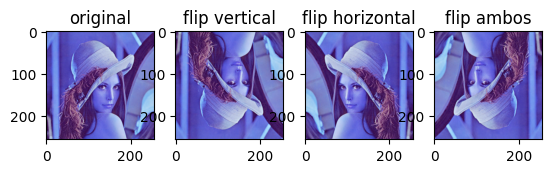

In [15]:
# FLIPPING

# Leer la imagen "Lena_RGB.png" en formato RGB
img = cv2.imread('images/Lena_RGB.png')

# Voltear la imagen para conseguir las siguientes transformaciones. Utiliza el método "cv2.flip()"
  
flipVertical = cv2.flip(img, 0) #0 Vertical
flipHorizontal = cv2.flip(img, 1) #1 Horizontal
flipBoth = cv2.flip(img, -1) #<0 Ambos
 
figs, ax = plt.subplots(1,4)
ax[0].imshow(img, cmap='gray'), ax[0].set_title('original')
ax[1].imshow(flipVertical, cmap='gray'), ax[1].set_title('flip vertical')
ax[2].imshow(flipHorizontal, cmap='gray'), ax[2].set_title('flip horizontal')
ax[3].imshow(flipBoth, cmap='gray'), ax[3].set_title('flip ambos')
plt.show()